In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

In [198]:
df = pd.read_csv("Diabetes-dataset_3_FT.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,0.798645,1.556957,1.0
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.328392,-0.163949,0.0
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,0.982401,-0.073375,1.0
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.079749,-1.069690,0.0
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.165203,0.017199,1.0
...,...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,-1.063415,2.734419,0.0
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.373310,-0.526245,0.0
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.761239,-0.254523,0.0
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,-0.336558,1.285235,1.0


## Seperating dependent and independent variables

In [199]:
X = df.iloc[:,:-1].values # grab all rows for all columns except last column. This is independ var
X

array([[ 0.86527574, -0.00512393,  0.92845833, ...,  0.21797752,
         0.79864498,  1.55695702],
       [-1.20598931, -0.54277224,  0.5460018 , ..., -0.87467912,
        -0.32839152, -0.16394935],
       [ 2.01597855, -0.72198835, -1.30253807, ..., -1.38978867,
         0.98240093, -0.07337533],
       ...,
       [-0.02240928, -0.00512393,  0.16354528, ..., -0.93711664,
        -0.76123887, -0.25452337],
       [ 0.14197684, -1.08042056, -1.30253807, ..., -0.3283508 ,
        -0.33655845,  1.28523497],
       [-0.94297153, -0.18434003,  0.67348731, ..., -0.28152266,
        -0.47539628, -0.88854151]], shape=(768, 7))

In [200]:
column_names = df.columns[:-1]  # Get column names
column_names

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [201]:
Y = df.iloc[:,-1].values # this is depend var.
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

## Test-train split
- Now we split the DS in train and test. The train size is 66%, and the rest is test DS.

- By randomly rearranging the data points(i.e. shuffling), you can avoid biases, improve generalization, and make your models more robust


In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True, random_state=42)

## Model Selection

In [203]:
from sklearn import metrics
from sklearn.metrics import classification_report

### Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[141  33]
 [ 34  54]]
Accuracy by confusion matrix: 0.7442748091603053


                  precision    recall  f1-score   support

without diabetes       0.81      0.81      0.81       174
   with diabetes       0.62      0.61      0.62        88

        accuracy                           0.74       262
       macro avg       0.71      0.71      0.71       262
    weighted avg       0.74      0.74      0.74       262

----------------------------------------------------------------------


### Naive Bayes

In [205]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[133  41]
 [ 35  53]]
Accuracy by confusion matrix: 0.7099236641221374


                  precision    recall  f1-score   support

without diabetes       0.79      0.76      0.78       174
   with diabetes       0.56      0.60      0.58        88

        accuracy                           0.71       262
       macro avg       0.68      0.68      0.68       262
    weighted avg       0.72      0.71      0.71       262

----------------------------------------------------------------------


### K-nearest neighbors

In [206]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[138  36]
 [ 45  43]]
Accuracy by confusion matrix: 0.6908396946564885


                  precision    recall  f1-score   support

without diabetes       0.75      0.79      0.77       174
   with diabetes       0.54      0.49      0.51        88

        accuracy                           0.69       262
       macro avg       0.65      0.64      0.64       262
    weighted avg       0.68      0.69      0.69       262

----------------------------------------------------------------------


### Decision tree Classifier

In [207]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[129  45]
 [ 33  55]]
Accuracy by confusion matrix: 0.7022900763358778


                  precision    recall  f1-score   support

without diabetes       0.80      0.74      0.77       174
   with diabetes       0.55      0.62      0.59        88

        accuracy                           0.70       262
       macro avg       0.67      0.68      0.68       262
    weighted avg       0.71      0.70      0.71       262

----------------------------------------------------------------------


### Support Vector Classifier

In [208]:
from sklearn import svm
svm = svm.SVC(kernel='poly') 
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[152  22]
 [ 49  39]]
Accuracy by confusion matrix: 0.7290076335877863


                  precision    recall  f1-score   support

without diabetes       0.76      0.87      0.81       174
   with diabetes       0.64      0.44      0.52        88

        accuracy                           0.73       262
       macro avg       0.70      0.66      0.67       262
    weighted avg       0.72      0.73      0.71       262

----------------------------------------------------------------------


### Random Forest Classifier

In [209]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[139  35]
 [ 31  57]]
Accuracy by confusion matrix: 0.7480916030534351


                  precision    recall  f1-score   support

without diabetes       0.82      0.80      0.81       174
   with diabetes       0.62      0.65      0.63        88

        accuracy                           0.75       262
       macro avg       0.72      0.72      0.72       262
    weighted avg       0.75      0.75      0.75       262

----------------------------------------------------------------------


### conclusion
Accuracy for each of above models:
- Log regression : 74.4%
- Naive Bayes    : 70.9%
- KNN            : 69.0%
- Decision Tree  : 70.2%
- SVC            : 72.9%
- Random Frst. Cl: 74.8%

**It seems RFC does better among all, and next best model is Log Regression.**
**Lets keep RFC.**

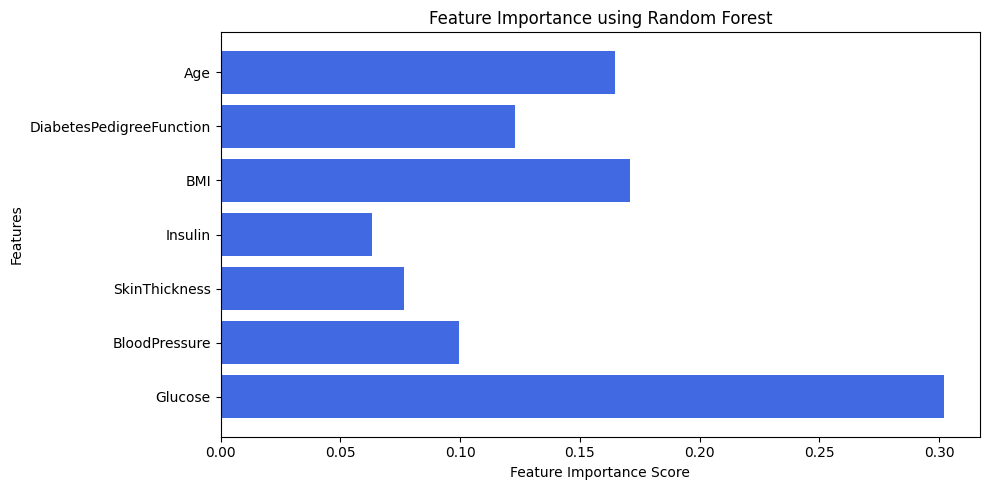

In [210]:
# Lets read Feature Importance
importances = rfc.feature_importances_
feature_names = df.columns[:-1]

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()

It seems that RFC views Glucose most important feature, and then there is BMI, Age and DiabetesPedigreeFunction. Visualizing feature importance helps us identify which features influence the model’s predictions most.

## Lets save the model

In [225]:
import pickle
pickle.dump(rfc, open('model_saved/rfc.pkl','wb')) #Save the model for future

## Evaluate Results

In [212]:
# Lets upload the unscaled data
df_copy= pd.read_csv("diabetes-dataset_2_FS.csv") # changed
print(df_copy)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148.0           72.0           35.0      0.0  33.6   
1       85.0           66.0           29.0      0.0  26.6   
2      183.0           64.0            0.0      0.0  23.3   
3       89.0           66.0           23.0     94.0  28.1   
4      137.0           40.0           35.0    168.0  43.1   
..       ...            ...            ...      ...   ...   
763    101.0           76.0           48.0    180.0  32.9   
764    122.0           70.0           27.0      0.0  36.8   
765    121.0           72.0           23.0    112.0  26.2   
766    126.0           60.0            0.0      0.0  30.1   
767     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                    0.627000  50.0      1.0  
1                    0.351000  31.0      0.0  
2                    0.672000  32.0      1.0  
3                    0.167000  21.0      0.0  
4                    0.471876  3

In [213]:
Y_pred = rfc.predict(X) # make prediction on whole dataset
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
print(Y_pred)

     Y_pred
0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
..      ...
763     0.0
764     0.0
765     0.0
766     1.0
767     0.0

[768 rows x 1 columns]


In [214]:
df_results = pd.concat([df_copy, Y_pred], axis=1)
print(df_results)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148.0           72.0           35.0      0.0  33.6   
1       85.0           66.0           29.0      0.0  26.6   
2      183.0           64.0            0.0      0.0  23.3   
3       89.0           66.0           23.0     94.0  28.1   
4      137.0           40.0           35.0    168.0  43.1   
..       ...            ...            ...      ...   ...   
763    101.0           76.0           48.0    180.0  32.9   
764    122.0           70.0           27.0      0.0  36.8   
765    121.0           72.0           23.0    112.0  26.2   
766    126.0           60.0            0.0      0.0  30.1   
767     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  Y_pred  
0                    0.627000  50.0      1.0     1.0  
1                    0.351000  31.0      0.0     0.0  
2                    0.672000  32.0      1.0     1.0  
3                    0.167000  21.0      0.0   

Here Outcome is the actual value, and Y_pred is the predicted value.

In [217]:
#TODO compare with original
df_results.to_csv('Diabetes-dataset_4_RS.csv', encoding='utf-8', index=False)


## Visualizing Results

The total number of records in test dataset: 262


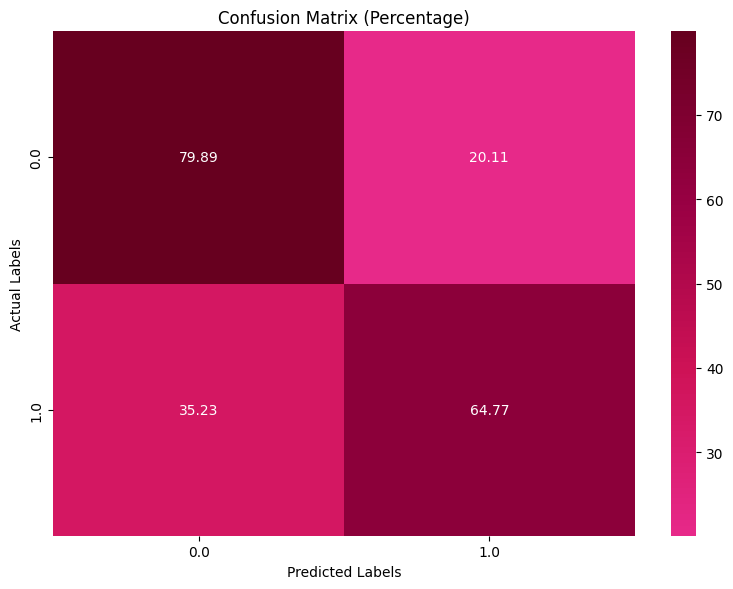

In [218]:
# Lets run RFC again, because we might have changed variable 
print(f"The total number of records in test dataset: {len(X_test)}")
Y_pred = rfc.predict(X_test)
conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# Convert to percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True) * 100

# Define class labels
class_names = np.unique(Y_test)  # Extract unique class names

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, # or use conf_matrix if you want to see the actual numbers
            annot=True, fmt=".2f",
            cmap='PuRd', center=0,
            xticklabels=class_names,
            yticklabels=class_names)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Percentage)")
plt.show()

### More visual analysis(optional)
Lets see if the 2 plots (Actual and Predicted) looks same. Ideally they should look similar.

<Axes: title={'center': 'Predicted'}, xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

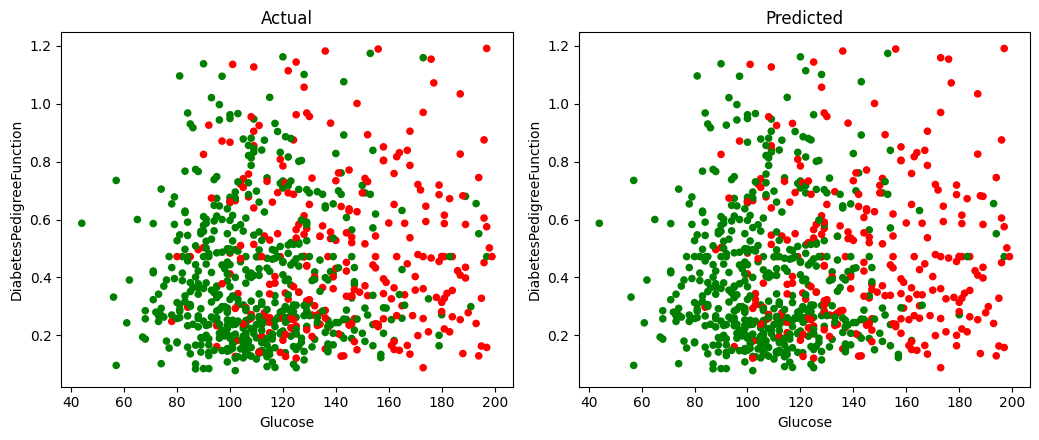

In [221]:
# First lets do for "Glucose" and "DiabetesPedigreeFunction", b/c they were high on feature importance scale
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'GREEN', 1:'RED'}
 
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Actual",ax=axis[0],c=df_results['Outcome'].map(colors))
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))

<Axes: title={'center': 'Predicted'}, xlabel='Glucose', ylabel='Age'>

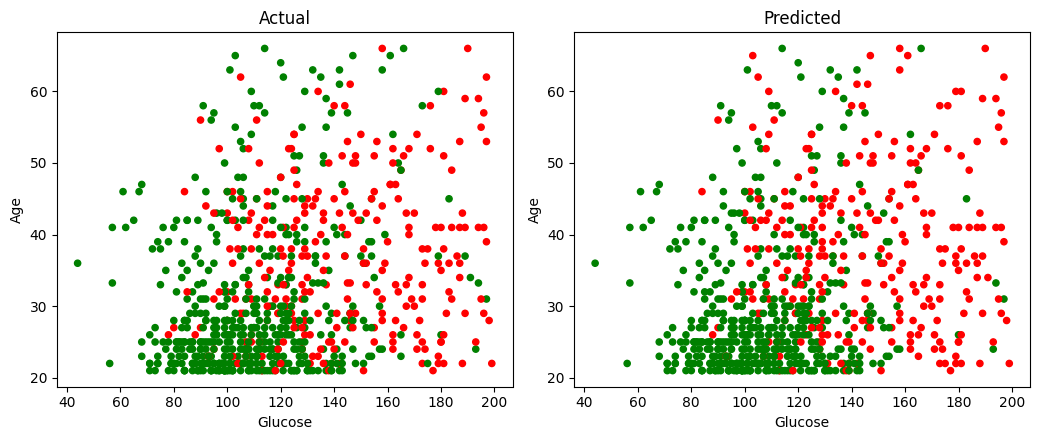

In [222]:
# First lets do for "Glucose" and "Age", b/c they were high on feature importance scale
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'GREEN', 1:'RED'}
 
df_results.plot.scatter("Glucose","Age",title="Actual",ax=axis[0],c=df_results['Outcome'].map(colors))
df_results.plot.scatter("Glucose","Age",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))